# Stop Sign Violations
traffic violations are no joke since many lives can be lost to reckless and careless driving. One thing in particular is that of running stop signs. Stop signs are purposefully placed in areas where pedestrians and oncoming traffic might be difficult to spot prior to entering an intersection, therefore, it is important to actually make the stop. Some complaint and question the placement of the actual signs in certain areas which makes them difficult to spot, therefore we hereby propose an experiment to test the potential effect of placing warning signs prior to an stop sign on driving behavior. 

data acquired from https://www.kaggle.com/rounak041993/traffic-violations-in-maryland-county

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
df = pd.DataFrame(pd.read_csv("Traffic_Violations.csv"))

dates = df["Date Of Stop"]
year = []
month = []
for date in dates:
    mylist = date.split("/")
    year.append(int(mylist[2]))
    month.append(int(mylist[0]))
df["Year"] = year
df["Month"] = month

df.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Month
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN,9
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)",8
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)",12
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)",8
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN,8


In [19]:
df1 = df[df["Description"].str.contains("STOP SIGN")==1]
len(df1)

42995

count        6.000000
mean      7165.833333
std       6835.491801
min        128.000000
25%       3071.000000
50%       5676.000000
75%       8838.250000
max      19420.000000
dtype: float64


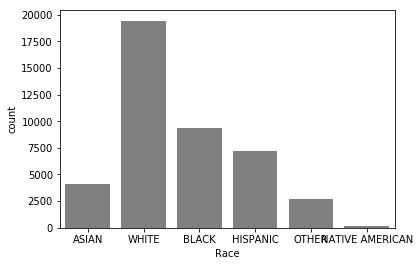

In [5]:
#plot stop sign violations by race
print(df1.groupby("Race").size().describe())
sns.countplot(df1["Race"], color = "grey")

In [6]:
# summary of daily stops
print(df1.groupby("Date Of Stop").size().describe())

count    2301.000000
mean       18.685354
std         9.841045
min         1.000000
25%        12.000000
50%        17.000000
75%        24.000000
max        72.000000
dtype: float64


In [ ]:
# process locaito

In [9]:
# stops by time 

In [69]:
import datetime as dt

times = df1["Time Of Stop"]
t = []
h = []

for time in times:
    values = time.split(":")
    t.append(dt.time(int(values[0]), int(values[1]), int(values[2])))
    h.append(int(values[0]))
    
df1["Time"] = t
df1["Hour"] = h


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


count      24.000000
mean     1791.458333
std       900.811614
min       259.000000
25%      1280.500000
50%      1835.000000
75%      2386.500000
max      3553.000000
dtype: float64


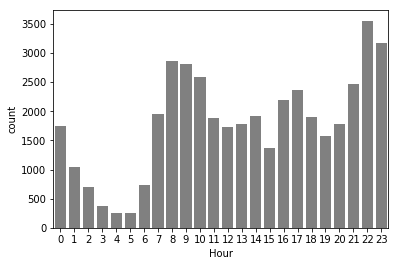

In [71]:
print(df1.groupby("Hour").size().describe())
sns.countplot(df1["Hour"], color = "grey")

In [10]:
# stops by location

In [68]:
print(df1.groupby("Location").size().sort_values(ascending=False).head(70))
len(df1.groupby("Location"))

#  " AT " " AND " " @ " "/" ""
#  " RD" " BLVD" " AVE" " DRIVE" " DR" " ST" " PL" " LN" " PKWY" 

Location
SELFRIDGE RD AT GRIDLEY RD                  441
MACARTHUR BLVD AND OBERLIN AVE              436
DIAMONDBACK DRIVE AT DECOVERLY DRIVE        364
PLYERS MILL RD AT LEXINGTON ST              337
UNIVERSITY AVE @ OXFORD RD                  325
PLYERS MILL RD @ LEXINGTON ST               248
UNIVERSITY/OXFORD                           232
SHADY GROVE RD/PINEY MEETINGHOUSE RD        206
BEL PRE RD / ARCTIC AVE                     195
PARKLAND DR @ FAROE PL                      187
POSTOAK RD @ ENID DR                        186
SCENERY DR @ MIDDLEBROOK RD                 162
MACARTHUR/OBERLIN                           144
E JEFFERSON ST AT CONGRESSIONAL LN          142
PLYERS MILL RD/ LEXINGTON ST                139
SHAW AVE/ FALMOUTH DR                       138
HALPINE RD AT CHAPMAN AVE                   138
CHESHIRE DR @ GROSVENOR LN                  123
CLARKSBURG ROAD @ GATEWAY CENTER DRIVE      117
BELLS MILL RD. @ DEMOCRACY LN E/B           112
OXFORD RD @ UNIVERSITY AVE     

15044

# rollout plan



# Evaluation Plan



In [ ]:
#pair wise t test


